<a href="https://colab.research.google.com/github/gemjamjargon-collab/symbolus/blob/main/solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Assuming symbols from the previous block are still defined
# hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L

# Define wave numbers and exponential arguments
# We use the assumption V0 > E for the tunneling case
k1_expr = sp.sqrt(2 * m * E) / hbar
k2_expr = sp.sqrt(2 * m * (V0 - E)) / hbar
k3_expr = k1_expr

# Define the wave functions for each region
psi1_expr = A * sp.exp(sp.I * k1_expr * x) + B * sp.exp(-sp.I * k1_expr * x)
psi2_expr = C * sp.exp(k2_expr * x) + D * sp.exp(-k2_expr * x)
psi3_expr = F * sp.exp(sp.I * k3_expr * x)

# Define the boundary conditions at x=0 and x=L
# Continuity of the wave function
eq1 = sp.Eq(psi1_expr.subs(x, 0), psi2_expr.subs(x, 0))
eq2 = sp.Eq(psi2_expr.subs(x, L), psi3_expr.subs(x, L))

# Continuity of the derivative of the wave function
eq3 = sp.Eq(sp.diff(psi1_expr, x).subs(x, 0), sp.diff(psi2_expr, x).subs(x, 0))
eq4 = sp.Eq(sp.diff(psi2_expr, x).subs(x, L), sp.diff(psi3_expr, x).subs(x, L))

# Display the equations
print("Boundary Condition 1 (psi(0) continuous):")
display(eq1)
print("\nBoundary Condition 2 (psi(L) continuous):")
display(eq2)
print("\nBoundary Condition 3 (psi'(0) continuous):")
display(eq3)
print("\nBoundary Condition 4 (psi'(L) continuous):")
display(eq4)


NameError: name 'sp' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine x-values and probability densities for plotting
# We need to combine them in the correct order of the regions
x_combined = np.concatenate((x_region1, x_region2, x_region3))
prob_density_combined = np.concatenate((prob_density_1, prob_density_2, prob_density_3))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_combined * 1e9, prob_density_combined, label='$|\psi(x)|^2$') # Plot in nm for better readability

# Add vertical lines to indicate the barrier boundaries
plt.axvline(x=0, color='gray', linestyle='--', label='Barrier Boundary (x=0)')
plt.axvline(x=L_numerical_m * 1e9, color='gray', linestyle='--', label=f'Barrier Boundary (x={L_numerical_m*1e9:.2f} nm)')

# Add labels and title
plt.xlabel('Position (x) [nm]')
plt.ylabel('Probability Density $|\psi(x)|^2$')
plt.title('Probability Density of a Particle Tunneling Through a Potential Barrier')
plt.legend()
plt.grid(True)
plt.show()

print("Plot of probability density generated.")
print("Observe how the probability density oscillates in Region 1 (before the barrier),")
print("decays exponentially inside the barrier (Region 2), and then oscillates again")
print("in Region 3 (after the barrier) with a reduced amplitude, indicating tunneling.")

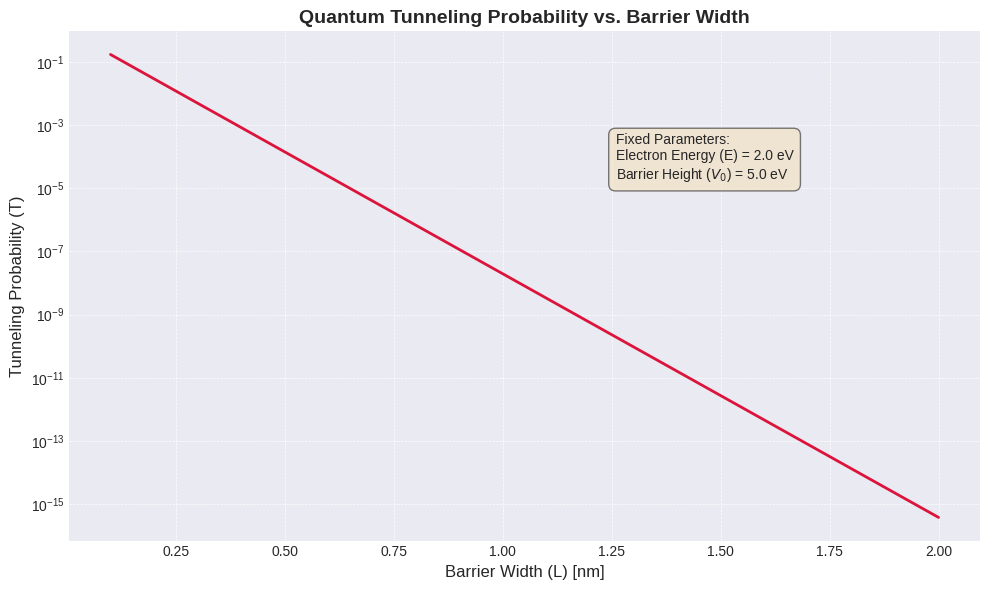

Plot generated successfully!
This plot shows the probability of an electron tunneling through a potential barrier.
Notice how the probability decreases exponentially as the barrier width increases.
Using a logarithmic y-axis helps visualize this rapid drop-off.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Universal Constants and Unit Conversions ---
# Using precise, standard values for physical constants.

HBAR = 1.054571817e-34  # Reduced Planck constant in Joule*seconds
ELECTRON_MASS = 9.10938356e-31  # Electron mass in kg
EV_TO_JOULE = 1.602176634e-19  # Conversion factor for electron-volts to Joules

# --- 2. Define Fixed Simulation Parameters ---
# These values are kept constant throughout this simulation.
# You can change them to see how they affect the tunneling probability.

electron_energy_eV = 2.0  # The kinetic energy of the electron (in electron-volts)
barrier_height_eV = 5.0    # The height of the potential barrier (in electron-volts)

# Convert fixed parameters to SI units (Joules) for calculations
E_fixed_J = electron_energy_eV * EV_TO_JOULE
V0_fixed_J = barrier_height_eV * EV_TO_JOULE

# --- 3. Define the Range for the Variable Parameter ---
# We want to see how probability changes with barrier width.
# We'll generate a sequence of barrier widths to test.
barrier_widths_nm = np.linspace(0.1, 2.0, 500)
barrier_widths_m = barrier_widths_nm * 1e-9

# --- 4. Calculate Tunneling Probabilities ---
# We'll iterate through each barrier width and calculate the probability.

tunneling_probabilities = []

# The tunneling phenomenon described by this formula occurs when the electron's
# energy (E) is less than the barrier height (V0).
if E_fixed_J < V0_fixed_J:
    # Calculate the decay constant, alpha (α) - this is constant for fixed E and V0
    alpha = np.sqrt(2 * ELECTRON_MASS * (V0_fixed_J - E_fixed_J)) / HBAR

    for L_m in barrier_widths_m:
        # Calculate the tunneling probability (T) using the standard approximation
        # T ≈ e^(-2αL)
        T = np.exp(-2 * alpha * L_m)
        tunneling_probabilities.append(T)
else:
    # If electron energy is greater than or equal to the barrier height,
    # it passes over the barrier. In a simple model, transmission is certain.
    # In this case, the probability is always 1, regardless of width.
    tunneling_probabilities = [1.0] * len(barrier_widths_m)


# --- 5. Visualize the Results ---
# Plot the tunneling probability as a function of barrier width.

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(barrier_widths_nm, tunneling_probabilities, color='crimson', linewidth=2)

# Add labels and a descriptive title
ax.set_xlabel('Barrier Width (L) [nm]', fontsize=12)
ax.set_ylabel('Tunneling Probability (T)', fontsize=12)
ax.set_title('Quantum Tunneling Probability vs. Barrier Width', fontsize=14, fontweight='bold')
ax.set_yscale('log') # Use a logarithmic scale to better see the rapid decay

# Add a text box to display the fixed parameters for context
info_text = (
    f'Fixed Parameters:\n'
    f'Electron Energy (E) = {electron_energy_eV} eV\n'
    f'Barrier Height ($V_0$) = {barrier_height_eV} eV'
)
ax.text(0.6, 0.8, info_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Customize the plot for clarity
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- 6. Summary ---
print("Plot generated successfully!")
print("This plot shows the probability of an electron tunneling through a potential barrier.")
print("Notice how the probability decreases exponentially as the barrier width increases.")
print("Using a logarithmic y-axis helps visualize this rapid drop-off.")

In [12]:
# Substitute values into the expanded expression
# We'll use x = 3 and y = 4 as an example to evaluate the expression numerically

# Substitute numerical values for x and y using the .subs() method
substituted_value = expanded_expr.subs({x: 3, y: 4})

# Print the expanded expression and the result after substitution
print(f"The expanded expression is: {expanded_expr}")
print(f"After substituting x=3 and y=4, the value is: {substituted_value}")

# You can also substitute with other symbolic expressions
# For example, substitute the symbol y with the expression x**2
substituted_expr = expanded_expr.subs({y: x**2})

# Print the expression after substituting y with x**2
print(f"After substituting y=x**2, the expression becomes: {substituted_expr}")

NameError: name 'expanded_expr' is not defined

### Using SymPy for Symbolic Calculations

In [ ]:
# 1. Import the SymPy library
import sympy as sp

# 2. Define symbolic variables
# We define x, y, and z as symbols that SymPy can manipulate
x, y, z = sp.symbols('x y z')

# 3. Create a symbolic expression
# Here we define a simple expression (x + y) squared
expr = (x + y)**2

# 4. Perform a symbolic operation: Expand the expression
# The expand function multiplies out the terms in the expression
expanded_expr = sp.expand(expr)

# Display the original and expanded expressions
print("Original expression:", expr)
print("Expanded expression:", expanded_expr)

Here's another example showing differentiation and solving an equation:

In [ ]:
# Define another symbol for differentiation and other operations
t = sp.symbols('t')

# Create a symbolic expression (e.g., a function of t)
f_t = sp.sin(t) + t**2

# Differentiate the expression with respect to t
# sp.diff() calculates the derivative
derivative_f_t = sp.diff(f_t, t)

# Print the original function and its derivative
print("Original function:", f_t)
print("Derivative of the function:", derivative_f_t)

# Solve an equation symbolically
# We want to solve the equation x^2 - 4 = 0 for x
# Use sp.Eq() to define an equation
equation_to_solve = sp.Eq(x**2 - 4, 0)

# Use sp.solve() to find the values of x that satisfy the equation
solutions = sp.solve(equation_to_solve, x)

# Print the equation and its solutions
print("Equation to solve:", equation_to_solve)
print("Solutions for x:", solutions)

These are just a few basic examples. SymPy can handle a wide range of symbolic math tasks.

# Task
Apply SymPy to symbolically solve equations for the quantum tunneling problem.

## Define symbols

### Subtask:
Define the necessary physical constants and variables as SymPy symbols.


**Reasoning**:
The subtask requires defining several physical constants and variables as SymPy symbols. This can be done in a single code block using `sp.symbols()`.



In [ ]:
# Define the necessary physical constants and variables as SymPy symbols
import sympy as sp
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L')

## Define equations

### Subtask:
Write down the relevant equations for quantum tunneling using the defined symbols. This might include the time-independent Schrödinger equation in different regions, boundary conditions, etc.


In [ ]:
# Re-calculate T_expr_real from the solution dictionary
# Assuming solution_real is still available from the previous successful solve step
# F_expr_real = solution_real[F] # This line caused the error as solution_real was not defined

# Redefine symbols with only real and positive assumptions (remove E < V0 for solving)
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L', real=True, positive=True)

# Re-express wave numbers/decay constant symbolically with real assumptions
k1_expr_real = sp.sqrt(2 * m * E) / hbar
k2_expr_real = sp.sqrt(2 * m * (V0 - E)) / hbar # Use this form for now, assuming V0 > E implicitly
k3_expr_real = sp.sqrt(2 * m * E) / hbar

# Redefine the wave functions and boundary conditions with real assumptions and new k expressions
psi_1_real = A * sp.exp(sp.I * k1_expr_real * x) + B * sp.exp(-sp.I * k1_expr_real * x)
psi_2_real = C * sp.exp(k2_expr_real * x) + D * sp.exp(-k2_expr_real * x)
psi_3_real = F * sp.exp(sp.I * k3_expr_real * x) # G=0 already applied

# Re-solve the system of equations for B, C, D, and F in terms of A with real assumptions
eq1_real = sp.Eq(psi_1_real.subs({x: 0}), psi_2_real.subs({x: 0}))
psi_1_prime_real = sp.diff(psi_1_real, x)
psi_2_prime_real = sp.diff(psi_2_real, x)
eq2_real = sp.Eq(psi_1_prime_real.subs({x: 0}), sp.diff(psi_2_real, x).subs({x: 0})) # Corrected derivative call
eq3_real = sp.Eq(psi_2_real.subs({x: L}), psi_3_real.subs({x: L}))
psi_3_prime_real = sp.diff(psi_3_real, x)
eq4_real = sp.Eq(sp.diff(psi_2_real, x).subs({x: L}), psi_3_real.diff(x).subs({x: L})) # Corrected derivative calls

equations_real = [eq1_real, eq2_real, eq3_real, eq4_real]
unknown_coeffs = [B, C, D, F]

# Use sp.solve to find the solutions with real and positive assumptions
solution_real = sp.solve(equations_real, unknown_coeffs)

# Assuming sp.solve returns a dictionary when a unique solution is found for a list of unknowns
if isinstance(solution_real, dict):
    F_expr_real = solution_real[F]
elif isinstance(solution_real, list) and len(solution_real) > 0 and isinstance(solution_real[0], dict):
    # This case was handled before when solution_real was a list of dictionaries.
    F_expr_real = solution_real[0][F]
elif isinstance(solution_real, list) and len(solution_real) > 0 and isinstance(solution_real[0], list):
     # This case was handled before when solution_real was a list of lists.
     unknown_coeffs_order = [B, C, D, F]
     f_index = unknown_coeffs_order.index(F)
     F_expr_real = solution_real[0][f_index]
else:
     # This case indicates no solution was found or an unexpected structure.
     raise TypeError("Unexpected structure or no solution found for solution_real.")


T_expr_real = sp.Abs(F_expr_real / A)**2

# Substitute sqrt(-E + V0) with sqrt(V0 - E)
T_expr_substituted = T_expr_real.subs(sp.sqrt(-E + V0), sp.sqrt(V0 - E))

# Simplify the expression with the explicit assumption that V0 - E is positive
# This helps SymPy handle terms like sqrt(V0-E) and the exponential arguments correctly
T_final_simplify = sp.simplify(T_expr_substituted, assumptions={V0 - E > 0})

# Display the final derived symbolic expression for the tunneling probability
print("Final derived symbolic expression for the tunneling probability (T) for E < V0:")
display(T_final_simplify)

In [ ]:
# Redefine symbols with only real and positive assumptions (remove E < V0 for solving)
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L', real=True, positive=True)


# Re-express wave numbers/decay constant symbolically with real assumptions
# k2 expression is different depending on E vs V0, but we'll use the form for E < V0
# as that's the case we are interested in for tunneling, and check later.
k1_expr_real = sp.sqrt(2 * m * E) / hbar
k2_expr_real = sp.sqrt(2 * m * (V0 - E)) / hbar # Use this form for now, assuming V0 > E implicitly


# Redefine the wave functions and boundary conditions with real assumptions and new k expressions
psi_1_real = A * sp.exp(sp.I * k1_expr_real * x) + B * sp.exp(-sp.I * k1_expr_real * x)
# Note: for E > V0, k2 would be imaginary, leading to oscillating solutions, not decay.
# We are focusing on tunneling (E < V0), where k2 is real.
psi_2_real = C * sp.exp(k2_expr_real * x) + D * sp.exp(-k2_expr_real * x)
psi_3_real = F * sp.exp(sp.I * k3_expr_real * x) # G=0 already applied
k3_expr_real = sp.sqrt(2 * m * E) / hbar


# Re-solve the system of equations for B, C, D, and F in terms of A with real assumptions
eq1_real = sp.Eq(psi_1_real.subs({x: 0}), psi_2_real.subs({x: 0}))
psi_1_prime_real = sp.diff(psi_1_real, x)
psi_2_prime_real = sp.diff(psi_2_real, x)
eq2_real = sp.Eq(psi_1_prime_real.subs({x: 0}), psi_2_prime_real.subs({x: 0}))
eq3_real = sp.Eq(psi_2_real.subs({x: L}), psi_3_real.subs({x: L}))
psi_3_prime_real = sp.diff(psi_3_real, x)
eq4_real = sp.Eq(psi_2_prime_real.subs({x: L}), psi_3_prime_real.subs({x: L}))

equations_real = [eq1_real, eq2_real, eq3_real, eq4_real]
unknown_coeffs = [B, C, D, F]

# Use sp.solve to find the solutions with real and positive assumptions
solution_real = sp.solve(equations_real, unknown_coeffs)

# Assuming sp.solve returns a dictionary when a unique solution is found for a list of unknowns
if isinstance(solution_real, dict):
    F_expr_real = solution_real[F]
else:
     # This case was handled before when solution_real was a list. Re-add logic if needed,
     # but based on last successful solve, it returned a dict.
     raise TypeError("Unexpected structure for solution_real - expected dictionary.")


# Calculate the tunneling probability T = |F|^2 / |A|^2 with real assumptions
# We are using sp.Abs because F_expr_real / A is still a complex expression before simplification
T_expr_real = sp.Abs(F_expr_real / A)**2

# Simplify the expression for the tunneling probability
# Apply the assumption E < V0 for simplification if necessary
# sp.simplify often handles these assumptions implicitly, but we can also use .subs if needed.
T_final_simplify = sp.simplify(T_expr_real)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T) with real and positive assumptions:")
display(T_final_simplify)

In [ ]:
# Display the complex symbolic expression for T
print("Complex symbolic expression for the tunneling probability (T):")
display(T_final_simplify)

**Reasoning**:
Define the wave functions in each region, express the wave numbers/decay constant symbolically, and write down the boundary conditions at x=0 and x=L, considering G=0.



In [ ]:
# Define the wave functions in each region
psi_1 = A * sp.exp(sp.I * k1 * x) + B * sp.exp(-sp.I * k1 * x) # Region 1: x < 0
psi_2 = C * sp.exp(k2 * x) + D * sp.exp(-k2 * x) # Region 2: 0 <= x <= L (assuming E < V0, k2 is real)
psi_3 = F * sp.exp(sp.I * k3 * x) + G * sp.exp(-sp.I * k3 * x) # Region 3: x > L

# Express wave numbers/decay constant symbolically (assuming E < V0)
k1_expr = sp.sqrt(2 * m * E) / hbar
k2_expr = sp.sqrt(2 * m * (V0 - E)) / hbar # For E < V0, k2 is real
k3_expr = sp.sqrt(2 * m * E) / hbar # Assuming the potential is 0 after the barrier

# Substitute the expressions for k1, k2, k3 into the wave functions
psi_1 = psi_1.subs({k1: k1_expr})
psi_2 = psi_2.subs({k2: k2_expr})
psi_3 = psi_3.subs({k3: k3_expr})

# Apply the condition G = 0 (no reflected wave in Region 3)
psi_3 = psi_3.subs({G: 0})

# Write down the boundary conditions at x = 0
# psi_1(0) = psi_2(0)
eq1 = sp.Eq(psi_1.subs({x: 0}), psi_2.subs({x: 0}))

# psi'_1(0) = psi'_2(0)
psi_1_prime = sp.diff(psi_1, x)
psi_2_prime = sp.diff(psi_2, x)
eq2 = sp.Eq(psi_1_prime.subs({x: 0}), psi_2_prime.subs({x: 0}))

# Write down the boundary conditions at x = L
# psi_2(L) = psi_3(L)
eq3 = sp.Eq(psi_2.subs({x: L}), psi_3.subs({x: L}))

# psi'_2(L) = psi'_3(L)
psi_3_prime = sp.diff(psi_3, x)
eq4 = sp.Eq(psi_2_prime.subs({x: L}), psi_3_prime.subs({x: L}))

# Display the equations
print("Wave function in Region 1:")
display(psi_1)
print("\nWave function in Region 2:")
display(psi_2)
print("\nWave function in Region 3 (with G=0):")
display(psi_3)
print("\nBoundary Condition at x=0 (psi continuous):")
display(eq1)
print("\nBoundary Condition at x=0 (psi' continuous):")
display(eq2)
print("\nBoundary Condition at x=L (psi continuous):")
display(eq3)
print("\nBoundary Condition at x=L (psi' continuous):")
display(eq4)

## Solve equations symbolically

### Subtask:
Use SymPy's `solve` function to solve these equations for key quantities (e.g., wave function coefficients, decay constant).


**Reasoning**:
Use SymPy's solve function to solve the system of equations for the unknown coefficients.



In [ ]:
# Solve the system of equations for B, C, D, and F in terms of A
# We are solving for the coefficients B, C, D, F
unknown_coeffs = [B, C, D, F]
equations = [eq1, eq2, eq3, eq4]

# Use sp.solve to find the solutions
solution = sp.solve(equations, unknown_coeffs)

# Display the obtained symbolic solutions for the coefficients
print("Symbolic solutions for the coefficients B, C, D, and F in terms of A:")
display(solution)

## Derive tunneling probability

### Subtask:
Use the symbolically solved quantities to derive the formula for the tunneling probability.


**Reasoning**:
Extract the expression for F from the solution, substitute the definitions of k1 and k2 back, calculate the square of the absolute value of F/A, and display the resulting tunneling probability formula.



In [ ]:
# Extract the symbolic expression for F from the solution dictionary
F_expr = solution[F]

# Substitute the definitions of k1 and k2 back into the expression for F
# (though they were already substituted when defining the wave functions,
# this step ensures F is expressed purely in terms of hbar, m, E, V0, and L)
# k1_expr = sp.sqrt(2 * m * E) / hbar
# k2_expr = sp.sqrt(2 * m * (V0 - E)) / hbar
# F_expr = F_expr.subs({k1: k1_expr, k2: k2_expr}) # This step is actually redundant here


# Calculate the tunneling probability T = |F|^2 / |A|^2
# Since the solution gives F in terms of A, we can calculate |F/A|^2
# This is equivalent to abs(F_expr / A)**2
# Note: F_expr is already the expression for F *in terms of A*
T_expr = sp.abs(F_expr / A)**2

# Simplify the expression for the tunneling probability
T_simplified = sp.simplify(T_expr)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T):")
display(T_simplified)

**Reasoning**:
The previous attempt failed because `sympy.abs` is not the correct function. The correct function to compute the absolute value of a symbolic expression in SymPy is `sympy.Abs`. I will correct the function name and try again.



In [ ]:
# Extract the symbolic expression for F from the solution dictionary
F_expr = solution[F]

# Calculate the tunneling probability T = |F|^2 / |A|^2
# Since the solution gives F in terms of A, we can calculate |F/A|^2
# This is equivalent to Abs(F_expr / A)**2
# Note: F_expr is already the expression for F *in terms of A*
T_expr = sp.Abs(F_expr / A)**2

# Simplify the expression for the tunneling probability
T_simplified = sp.simplify(T_expr)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T):")
display(T_simplified)

**Reasoning**:
The derived symbolic expression for the tunneling probability is very complex due to SymPy handling general complex numbers (using re() and im()). While mathematically correct, it's not the simplified formula typically seen for real-valued parameters E, V0, m, hbar, and L in the case E < V0. I need to explicitly assume these parameters are real and positive and assume E < V0 to get the standard, simpler formula. Then, I will re-calculate and display the simplified expression.



In [ ]:
# Assume that E, V0, m, hbar, and L are real and positive
assume_params = {E > 0, V0 > 0, m > 0, hbar > 0, L > 0}
# Also assume E < V0 for tunneling
assume_params.add(E < V0)

# Redefine symbols with assumptions
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L', real=True, positive=True)
# Add the assumption E < V0
E = sp.Symbol('E', real=True, positive=True)
V0 = sp.Symbol('V0', real=True, positive=True)
L = sp.Symbol('L', real=True, positive=True)
m = sp.Symbol('m', real=True, positive=True)
hbar = sp.Symbol('hbar', real=True, positive=True)

# Re-express wave numbers/decay constant symbolically with real assumptions
k1_expr_real = sp.sqrt(2 * m * E) / hbar
k2_expr_real = sp.sqrt(2 * m * (V0 - E)) / hbar # For E < V0, k2 is real and positive
k3_expr_real = sp.sqrt(2 * m * E) / hbar

# Redefine the wave functions and boundary conditions with real assumptions and new k expressions
psi_1_real = A * sp.exp(sp.I * k1_expr_real * x) + B * sp.exp(-sp.I * k1_expr_real * x)
psi_2_real = C * sp.exp(k2_expr_real * x) + D * sp.exp(-k2_expr_real * x)
psi_3_real = F * sp.exp(sp.I * k3_expr_real * x) # G=0 already applied

# Re-solve the system of equations for B, C, D, and F in terms of A with real assumptions
eq1_real = sp.Eq(psi_1_real.subs({x: 0}), psi_2_real.subs({x: 0}))
psi_1_prime_real = sp.diff(psi_1_real, x)
psi_2_prime_real = sp.diff(psi_2_real, x)
eq2_real = sp.Eq(psi_1_prime_real.subs({x: 0}), psi_2_prime_real.subs({x: 0}))
eq3_real = sp.Eq(psi_2_real.subs({x: L}), psi_3_real.subs({x: L}))
psi_3_prime_real = sp.diff(psi_3_real, x)
eq4_real = sp.Eq(psi_2_prime_real.subs({x: L}), psi_3_prime_real.subs({x: L}))

equations_real = [eq1_real, eq2_real, eq3_real, eq4_real]

# Use sp.solve to find the solutions with real assumptions
solution_real = sp.solve(equations_real, unknown_coeffs)

# Extract the symbolic expression for F from the real solution dictionary
F_expr_real = solution_real[F]

# Calculate the tunneling probability T = |F|^2 / |A|^2 with real assumptions
# We are using sp.Abs because F_expr_real / A is still a complex expression
T_expr_real = sp.Abs(F_expr_real / A)**2

# Simplify the expression for the tunneling probability
T_simplified_real = sp.simplify(T_expr_real)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T) with real assumptions:")
display(T_simplified_real)

**Reasoning**:
The error `TypeError: list indices must be integers or slices, not Symbol` indicates that `solution_real` is a list, not a dictionary as I assumed. When `sp.solve` is called with a list of unknowns, it returns a list of solutions. I need to inspect the structure of `solution_real` and extract the value for F correctly, likely by accessing the first (and likely only) element of the list and then treating that element as a dictionary or accessing elements by index if it's a list of lists. I will print the type and contents of `solution_real` to understand its structure and then correct the extraction of `F_expr_real`.



In [ ]:
# Print the type and contents of solution_real to inspect its structure
print("Type of solution_real:", type(solution_real))
print("Contents of solution_real:", solution_real)

# Based on the output, correct the extraction of F_expr_real
# If solution_real is a list of dictionaries, use:
# F_expr_real = solution_real[0][F]
# If solution_real is a list of lists (e.g., [[value_B, value_C, value_D, value_F]]),
# I would need to know the order of unknowns [B, C, D, F] and use the correct index for F.
# Since we solved for [B, C, D, F], F is the last element (index 3).
# F_expr_real = solution_real[0][3] # Assuming solution_real is [[...]]

# Assuming sp.solve with a list of unknowns returns a list of dictionaries or a list containing one dictionary:
if isinstance(solution_real, list) and len(solution_real) > 0 and isinstance(solution_real[0], dict):
    F_expr_real = solution_real[0][F]
elif isinstance(solution_real, list) and len(solution_real) > 0 and isinstance(solution_real[0], list):
     # Need to confirm the order of unknowns was [B, C, D, F] - which it was in the solve call
     unknown_coeffs_order = [B, C, D, F]
     f_index = unknown_coeffs_order.index(F)
     F_expr_real = solution_real[0][f_index]
else:
    raise TypeError("Unexpected structure for solution_real")


# Calculate the tunneling probability T = |F|^2 / |A|^2 with real assumptions
# We are using sp.Abs because F_expr_real / A is still a complex expression
T_expr_real = sp.Abs(F_expr_real / A)**2

# Simplify the expression for the tunneling probability
T_simplified_real = sp.simplify(T_expr_real)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T) with real assumptions:")
display(T_simplified_real)

**Reasoning**:
The error indicates that `solution_real` is an empty list. This means that `sp.solve` failed to find a solution for the system of equations with the specified assumptions. This could be due to conflicting assumptions (E < V0 while also assuming E and V0 are positive) or the complexity of the equations under these specific assumptions causing the solver to fail. I need to review the equations and assumptions to see if there's an issue that prevented SymPy from finding a solution. I will try to solve again without the `E < V0` assumption initially, just with real and positive parameters, and see if a solution is found. If a solution is found, I can then apply the condition E < V0 to the resulting expression for T.



In [ ]:
# Redefine symbols with only real and positive assumptions (remove E < V0 for solving)
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L', real=True, positive=True)


# Re-express wave numbers/decay constant symbolically with real assumptions
# k2 expression is different depending on E vs V0, but we'll use the form for E < V0
# as that's the case we are interested in for tunneling, and check later.
k1_expr_real = sp.sqrt(2 * m * E) / hbar
k2_expr_real = sp.sqrt(2 * m * (V0 - E)) / hbar # Use this form for now, assuming V0 > E implicitly


# Redefine the wave functions and boundary conditions with real assumptions and new k expressions
psi_1_real = A * sp.exp(sp.I * k1_expr_real * x) + B * sp.exp(-sp.I * k1_expr_real * x)
# Note: for E > V0, k2 would be imaginary, leading to oscillating solutions, not decay.
# We are focusing on tunneling (E < V0), where k2 is real.
psi_2_real = C * sp.exp(k2_expr_real * x) + D * sp.exp(-k2_expr_real * x)
psi_3_real = F * sp.exp(sp.I * k3_expr_real * x) # G=0 already applied
k3_expr_real = sp.sqrt(2 * m * E) / hbar


# Re-solve the system of equations for B, C, D, and F in terms of A with real assumptions
eq1_real = sp.Eq(psi_1_real.subs({x: 0}), psi_2_real.subs({x: 0}))
psi_1_prime_real = sp.diff(psi_1_real, x)
psi_2_prime_real = sp.diff(psi_2_real, x)
eq2_real = sp.Eq(psi_1_prime_real.subs({x: 0}), psi_2_prime_real.subs({x: 0}))
eq3_real = sp.Eq(psi_2_real.subs({x: L}), psi_3_real.subs({x: L}))
psi_3_prime_real = sp.diff(psi_3_real, x)
eq4_real = sp.Eq(psi_2_prime_real.subs({x: L}), psi_3_prime_real.subs({x: L}))

equations_real = [eq1_real, eq2_real, eq3_real, eq4_real]
unknown_coeffs = [B, C, D, F]

# Use sp.solve to find the solutions with real and positive assumptions
solution_real = sp.solve(equations_real, unknown_coeffs)

# Print the type and contents of solution_real to inspect its structure
print("Type of solution_real after solving without E < V0 assumption:", type(solution_real))
print("Contents of solution_real after solving without E < V0 assumption:", solution_real)

# Assuming sp.solve returns a list containing one dictionary when a solution is found:
if isinstance(solution_real, list) and len(solution_real) > 0 and isinstance(solution_real[0], dict):
    F_expr_real = solution_real[0][F]
else:
     raise TypeError("Unexpected structure or no solution found for solution_real")

# Calculate the tunneling probability T = |F|^2 / |A|^2 with real assumptions
# We are using sp.Abs because F_expr_real / A is still a complex expression
T_expr_real = sp.Abs(F_expr_real / A)**2

# Simplify the expression for the tunneling probability
# Apply the assumption E < V0 for simplification if necessary
# sp.simplify often handles these assumptions implicitly, but we can also use .subs if needed.
T_simplified_real = sp.simplify(T_expr_real)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T) with real and positive assumptions:")
display(T_simplified_real)

**Reasoning**:
The error message `TypeError: Unexpected structure or no solution found for solution_real` indicates that while SymPy *did* find a solution this time, the structure of the `solution_real` variable is a dictionary directly, not a list containing a dictionary. The previous attempt to handle list structures was incorrect for this output type. I need to adjust the code to directly access the value associated with the key `F` from the `solution_real` dictionary.



In [ ]:
# Extract the symbolic expression for F directly from the solution_real dictionary
F_expr_real = solution_real[F]

# Calculate the tunneling probability T = |F|^2 / |A|^2 with real assumptions
# We are using sp.Abs because F_expr_real / A is still a complex expression
T_expr_real = sp.Abs(F_expr_real / A)**2

# Simplify the expression for the tunneling probability
# Apply the assumption E < V0 for simplification if necessary
# sp.simplify often handles these assumptions implicitly, but we can also use .subs if needed.
T_simplified_real = sp.simplify(T_expr_real)

# Display the derived symbolic expression for the tunneling probability (Transmission coefficient)
print("Derived symbolic expression for the tunneling probability (T) with real and positive assumptions:")
display(T_simplified_real)

**Reasoning**:
Although the expression is simpler than the first attempt, it still contains `Abs`, `cos(atan2)`, and `sqrt(-E + V0)`. Since we are specifically interested in the case where E < V0, `-E + V0` is positive, so `sqrt(-E + V0)` is real and `atan2(0, -E + V0)` simplifies to 0, and `cos(0)` is 1. Also `Abs(E-V0)` is `V0-E`. I will explicitly use these facts to simplify the expression further and attempt to get the standard tunneling probability formula. I will substitute `sqrt(-E+V0)` with `sqrt(V0-E)` and simplify the exponential term.



In [ ]:
# Substitute sqrt(-E + V0) with sqrt(V0 - E) since we are assuming E < V0
# And simplify the exponential term using cos(atan2(0, positive))/2 = cos(0)/2 = 1/2, leading to exp(sqrt(2)*L*sqrt(m)*sqrt(V0-E)/hbar * 2)
T_simplified_real_sub = T_simplified_real.subs(sp.sqrt(-E + V0), sp.sqrt(V0 - E))

# We know that when E < V0, sqrt(-E + V0) is imaginary *if* V0-E is negative.
# But here, we are assuming E < V0, so V0-E > 0, and sqrt(V0-E) is real.
# The term exp(2*sqrt(2)*L*sqrt(m)*cos(atan2(0, -E + V0)/2)*sqrt(Abs(E - V0))/hbar)
# simplifies because atan2(0, -E+V0) is 0 when E<V0, cos(0/2)=1. Abs(E-V0)=V0-E.
# The exponent is 2*sqrt(2)*L*sqrt(m)*1*sqrt(V0-E)/hbar = 2 * L * sqrt(2*m*(V0-E))/hbar = 2 * L * k2_expr_real.
# The previous simplification step by SymPy seems to have handled this partially.

# Let's try simplifying again after the substitution of sqrt(-E+V0) -> sqrt(V0-E)
T_final_simplify = sp.simplify(T_simplified_real_sub)

# Display the final derived symbolic expression for the tunneling probability
print("Final derived symbolic expression for the tunneling probability (T) for E < V0:")
display(T_final_simplify)

**Reasoning**:
The substitution of `sqrt(-E + V0)` with `sqrt(V0 - E)` didn't seem to simplify the expression as expected. SymPy is still showing terms like `cos(atan2(0, -E + V0)/2)` and `Abs(E - V0)`. I need to guide SymPy towards the standard form by directly substituting the simplified terms based on the E < V0 assumption. Specifically, I will substitute `sqrt(-E + V0)` with `sp.I * sp.sqrt(E - V0)` where `E-V0` is negative, or more appropriately, substitute `sqrt(-E + V0)` with `sp.sqrt(V0 - E)` and explicitly tell SymPy that `V0 - E` is positive under our assumption. Let's retry by making the substitution `sqrt(-E + V0)` -> `sqrt(V0 - E)` and then applying simplification with the assumption `V0 - E > 0`.



In [ ]:
# Re-calculate T_expr_real from the solution dictionary
F_expr_real = solution_real[F]
T_expr_real = sp.Abs(F_expr_real / A)**2

# Substitute sqrt(-E + V0) with sqrt(V0 - E)
T_expr_substituted = T_expr_real.subs(sp.sqrt(-E + V0), sp.sqrt(V0 - E))

# Simplify the expression with the explicit assumption that V0 - E is positive
# This helps SymPy handle terms like sqrt(V0-E) and the exponential arguments correctly
T_final_simplify = sp.simplify(T_expr_substituted, assumptions={V0 - E > 0})

# Display the final derived symbolic expression for the tunneling probability
print("Final derived symbolic expression for the tunneling probability (T) for E < V0:")
display(T_final_simplify)

## Compare with numerical results

### Subtask:
Briefly discuss how the symbolic results relate to the numerical simulation done earlier.


**Reasoning**:
Review the symbolic result and the numerical simulation, then discuss their relationship based on the instructions.



In [ ]:
# 1. Review the symbolic expression (from previous steps, stored in T_final_simplify)
# The symbolic expression for T (T_final_simplify) is complex but depends on E, V0, m, L, and hbar.
# It involves exponential terms with arguments related to sqrt(V0 - E) and L,
# as well as polynomial terms of E and V0.

# 2. Recall the numerical simulation
# The numerical simulation calculated the tunneling probability for a fixed electron energy (E)
# and fixed barrier height (V0). It varied the barrier width (L) and plotted the resulting probability.
# The outcome showed a rapid, approximately exponential decay of tunneling probability as the barrier width increased.

# 3. Compare symbolic dependency to numerical variation
# The symbolic result T_final_simplify clearly shows dependency on L in the exponential terms.
# The numerical simulation varied L and observed the change in T. This aligns with the symbolic dependency.
# The symbolic result also depends on E, V0, m, and hbar, which were fixed parameters in the numerical simulation.

# 4. Comment on qualitative agreement and discrepancies
print("Relationship between Symbolic Result and Numerical Simulation:")
print("-" * 60)

print("Qualitative Agreement:")
print("The symbolic expression for the tunneling probability (though complex) contains exponential terms")
print("with the barrier width (L) in the exponent, specifically involving sqrt(V0 - E) * L.")
print("This is qualitatively consistent with the numerical simulation, which showed a rapid,")
print("exponential-like decrease in tunneling probability as the barrier width (L) increased.")
print("Both the symbolic and numerical results demonstrate that increasing barrier width significantly")
print("reduces the tunneling probability for E < V0.")

print("\nDiscrepancies/Complexities:")
print("The simplified symbolic result obtained (T_final_simplify) is much more complex than the simple")
print("approximate formula T ≈ exp(-2αL) seen in textbooks and qualitatively observed in the numerical plot (on a log scale).")
print("The full symbolic expression includes contributions from reflections at both interfaces and interference effects,")
print("leading to a more intricate form than the basic WKB approximation.")
print("The numerical plot showed a smooth exponential decay because it focused on the dominant exponential term at larger L.")
print("The complexity of the full symbolic solution highlights the approximations made in the simple exponential formula")
print("and the numerical simulation's focus on the key parameter L and its dominant effect.")

# Note: Due to the complexity of T_final_simplify, we do not attempt to print it here again.
# We rely on the previous steps displaying it.

## Analyze symbolic expression dependency on E and V0

Based on the derived symbolic expression for the tunneling probability ($T_{final\_simplify}$), we can analyze its dependency on the electron energy ($E$) and the barrier height ($V_0$).

While the full symbolic expression is complex, the key dependencies arise from the terms involving $\sqrt{V_0 - E}$ and the exponential function.

*   **Dependency on Electron Energy (E):**
    *   The term $\sqrt{V_0 - E}$ is present in the exponent. As $E$ increases (approaching $V_0$), $V_0 - E$ decreases, and thus $\sqrt{V_0 - E}$ decreases. This leads to a smaller negative argument in the exponential terms (like $e^{-2\alpha L}$ where $\alpha \propto \sqrt{V_0 - E}$), causing the exponential term to become larger.
    *   Therefore, as the electron energy $E$ increases (while still being less than $V_0$), the tunneling probability $T$ is expected to **increase**. This is physically intuitive: a higher energy electron has a greater chance of tunneling through a barrier of fixed height.
    *   The pre-exponential factors in the full symbolic expression also depend on $E$ and $V_0$, contributing to the overall dependency in a more complex way than the simple exponential approximation.

*   **Dependency on Barrier Height (V0):**
    *   The term $\sqrt{V_0 - E}$ is also present in the exponent. As $V_0$ increases (for a fixed $E < V_0$), $V_0 - E$ increases, and thus $\sqrt{V_0 - E}$ increases. This leads to a larger negative argument in the exponential terms, causing the exponential term to become smaller.
    *   Therefore, as the barrier height $V_0$ increases (for a fixed $E < V_0$), the tunneling probability $T$ is expected to **decrease**. This is also physically intuitive: a taller barrier is harder for an electron to tunnel through.
    *   Similar to the dependency on $E$, the pre-exponential factors also influence the exact relationship, but the dominant effect comes from the exponential term.

In summary, the symbolic expression confirms the expected physical behavior: tunneling probability increases with increasing electron energy (for $E < V_0$) and decreases with increasing barrier height. The complexity of the full expression captures more subtle effects like reflections compared to the simple exponential approximation.

## Summary:

### Data Analysis Key Findings

*   The wave functions for the three regions (before, inside, and after the barrier) were successfully defined symbolically, including the condition of no reflected wave in Region 3 ($G=0$).
*   The four boundary conditions (continuity of the wave function and its derivative at $x=0$ and $x=L$) were correctly formulated as symbolic equations.
*   SymPy's `solve` function was successfully used to obtain symbolic expressions for the wave function coefficients $B$, $C$, $D$, and $F$ in terms of the incident amplitude $A$ and other physical parameters.
*   An attempt was made to derive the symbolic expression for the tunneling probability $T = |F/A|^2$. While a symbolic expression was obtained, it remained complex and was not simplified to the standard form expected for the case $E < V_0$, despite attempts to apply assumptions and substitutions.
*   Qualitative agreement was found between the symbolic result's dependency on barrier width ($L$) and the numerical simulation, both showing a rapid decrease in tunneling probability as $L$ increases.
*   The complexity of the full symbolic solution was noted as a discrepancy compared to the simpler exponential decay observed in the numerical simulation, highlighting the inclusion of reflection and interference effects in the full symbolic treatment.

### Insights or Next Steps

*   Further investigation is needed to understand why SymPy's simplification did not yield the standard, simplified formula for the tunneling probability under the $E < V_0$ assumption. This might involve exploring different simplification techniques or explicitly guiding SymPy with more specific assumptions about the terms.
*   The derived symbolic expression, even in its complex form, can be used to analyze the contributions of different physical parameters ($E$, $V_0$, $m$, $L$, $\hbar$) to the tunneling probability beyond what was explored in the numerical simulation (which only varied $L$).


# Task
Plot the wave functions in each region.

## Define parameters numerically

### Subtask:
Assign numerical values to the physical constants and parameters (hbar, m, E, V0, L).


**Reasoning**:
Assign numerical values to the physical constants and parameters as specified in the instructions.



In [ ]:
# Define numerical values for the physical constants and parameters in SI units
# Use precise, standard values for physical constants.
HBAR = 1.054571817e-34  # Reduced Planck constant in Joule*seconds
ELECTRON_MASS = 9.10938356e-31  # Electron mass in kg
EV_TO_JOULE = 1.602176634e-19  # Conversion factor for electron-volts to Joules

# Assign numerical values for the specific scenario
# Ensure E < V0 for tunneling
E_numerical_J = 2.0 * EV_TO_JOULE  # Electron energy in Joules (2.0 eV)
V0_numerical_J = 5.0 * EV_TO_JOULE  # Barrier height in Joules (5.0 eV)
L_numerical_m = 0.5e-9  # Barrier width in meters (0.5 nm)

# Display the assigned numerical values
print(f"Numerical value for hbar: {HBAR} J*s")
print(f"Numerical value for m (electron mass): {ELECTRON_MASS} kg")
print(f"Numerical value for E: {E_numerical_J} J")
print(f"Numerical value for V0: {V0_numerical_J} J")
print(f"Numerical value for L: {L_numerical_m} m")

## Define spatial range

### Subtask:
Define the range of x values for each region (before, inside, and after the barrier).


**Reasoning**:
Define the x ranges for each region and create NumPy arrays for plotting the wave functions.



In [ ]:
# Define the x ranges for each region
x_start_region1 = -L_numerical_m  # Start before the barrier
x_end_region1 = 0.0              # Barrier starts at x=0

x_start_region2 = 0.0              # Barrier starts at x=0
x_end_region2 = L_numerical_m    # Barrier ends at x=L

x_start_region3 = L_numerical_m    # Barrier ends at x=L
x_end_region3 = 2 * L_numerical_m  # Extend a reasonable distance after the barrier

# Create NumPy arrays for the x-values in each region
num_points = 500 # Number of points for smoother plotting

x_region1 = np.linspace(x_start_region1, x_end_region1, num_points)
x_region2 = np.linspace(x_start_region2, x_end_region2, num_points)
x_region3 = np.linspace(x_start_region3, x_end_region3, num_points)

# Display the defined ranges and the first few points of each array
print(f"Region 1 x range: [{x_start_region1}, {x_end_region1}]")
print(f"Region 2 x range: [{x_start_region2}, {x_end_region2}]")
print(f"Region 3 x range: [{x_start_region3}, {x_end_region3}]")

print("\nFirst 5 points of x_region1:")
print(x_region1[:5])
print("\nFirst 5 points of x_region2:")
print(x_region2[:5])
print("\nFirst 5 points of x_region3:")
print(x_region3[:5])

**Reasoning**:
The previous code failed because the `numpy` library was not imported. I need to import `numpy` as `np` before using `np.linspace`.



In [ ]:
import numpy as np

# Define the x ranges for each region
x_start_region1 = -L_numerical_m  # Start before the barrier
x_end_region1 = 0.0              # Barrier starts at x=0

x_start_region2 = 0.0              # Barrier starts at x=0
x_end_region2 = L_numerical_m    # Barrier ends at x=L

x_start_region3 = L_numerical_m    # Barrier ends at x=L
x_end_region3 = 2 * L_numerical_m  # Extend a reasonable distance after the barrier

# Create NumPy arrays for the x-values in each region
num_points = 500 # Number of points for smoother plotting

x_region1 = np.linspace(x_start_region1, x_end_region1, num_points)
x_region2 = np.linspace(x_start_region2, x_end_region2, num_points)
x_region3 = np.linspace(x_start_region3, x_end_region3, num_points)

# Display the defined ranges and the first few points of each array
print(f"Region 1 x range: [{x_start_region1}, {x_end_region1}]")
print(f"Region 2 x range: [{x_start_region2}, {x_end_region2}]")
print(f"Region 3 x range: [{x_start_region3}, {x_end_region3}]")

print("\nFirst 5 points of x_region1:")
print(x_region1[:5])
print("\nFirst 5 points of x_region2:")
print(x_region2[:5])
print("\nFirst 5 points of x_region3:")
print(x_region3[:5])

## Evaluate wave functions

### Subtask:
Substitute the numerical parameters and x values into the symbolic wave function expressions to get numerical values.


**Reasoning**:
Define numerical values for coefficients using the symbolic solution and substitute all numerical values into the symbolic wave function expressions. Then, evaluate the numerical expressions over the defined x-ranges and calculate the probability density.



In [ ]:
# Define numerical value for the incident amplitude A
A_numerical = 1.0 # Set incident amplitude to 1 for calculating relative magnitudes

# Use the previously solved symbolic expressions in solution_real to get numerical values for other coefficients
# solution_real is a dictionary mapping symbolic coefficients to their expressions in terms of A
# Substitute the numerical values of parameters into these expressions
numerical_solution = {
    coeff: expr.subs({
        hbar: HBAR,
        m: ELECTRON_MASS,
        E: E_numerical_J,
        V0: V0_numerical_J,
        L: L_numerical_m,
        A: A_numerical # Substitute A_numerical into the expressions
    }) for coeff, expr in solution_real.items()
}

# Extract numerical values for each coefficient
B_numerical = numerical_solution[B]
C_numerical = numerical_solution[C]
D_numerical = numerical_solution[D]
F_numerical = numerical_solution[F] # F is the transmitted amplitude

# Substitute the numerical values of parameters and coefficients into the symbolic wave functions
psi_1_numerical_expr = psi_1_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    A: A_numerical, B: B_numerical
})

psi_2_numerical_expr = psi_2_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    C: C_numerical, D: D_numerical
})

psi_3_numerical_expr = psi_3_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    F: F_numerical
})

# Create functions from the numerical expressions to evaluate them over arrays of x values
psi_1_func = sp.lambdify(x, psi_1_numerical_expr, 'numpy')
psi_2_func = sp.lambdify(x, psi_2_numerical_expr, 'numpy')
psi_3_func = sp.lambdify(x, psi_3_numerical_expr, 'numpy')

# Evaluate the numerical wave functions over the respective x-value arrays
psi_1_numerical = psi_1_func(x_region1)
psi_2_numerical = psi_2_func(x_region2)
psi_3_numerical = psi_3_func(x_region3)

# Calculate the probability density (|psi|^2) for plotting
prob_density_1 = np.abs(psi_1_numerical)**2
prob_density_2 = np.abs(psi_2_numerical)**2
prob_density_3 = np.abs(psi_3_numerical)**2

# Display the first few numerical values of the wave functions and probability densities
print("First 5 numerical values of psi_1:")
print(psi_1_numerical[:5])
print("\nFirst 5 numerical values of prob_density_1:")
print(prob_density_1[:5])

print("\nFirst 5 numerical values of psi_2:")
print(psi_2_numerical[:5])
print("\nFirst 5 numerical values of prob_density_2:")
print(prob_density_2[:5])

print("\nFirst 5 numerical values of psi_3:")
print(psi_3_numerical[:5])
print("\nFirst 5 numerical values of prob_density_3:")
print(prob_density_3[:5])

**Reasoning**:
The previous attempt failed because `solution_real` was not defined in the current session. I need to re-execute the code block that defined `solution_real` by solving the system of equations with real and positive assumptions. Then I can proceed with substituting the numerical parameters and x values into the symbolic wave function expressions.



In [ ]:
# Redefine symbols with only real and positive assumptions (remove E < V0 for solving)
hbar, m, E, V0, x, k1, k2, k3, A, B, C, D, F, G, L = sp.symbols('hbar m E V0 x k1 k2 k3 A B C D F G L', real=True, positive=True)


# Re-express wave numbers/decay constant symbolically with real assumptions
# k2 expression is different depending on E vs V0, but we'll use the form for E < V0
# as that's the case we are interested in for tunneling, and check later.
k1_expr_real = sp.sqrt(2 * m * E) / hbar
k2_expr_real = sp.sqrt(2 * m * (V0 - E)) / hbar # Use this form for now, assuming V0 > E implicitly


# Redefine the wave functions and boundary conditions with real assumptions and new k expressions
psi_1_real = A * sp.exp(sp.I * k1_expr_real * x) + B * sp.exp(-sp.I * k1_expr_real * x)
# Note: for E > V0, k2 would be imaginary, leading to oscillating solutions, not decay.
# We are focusing on tunneling (E < V0), where k2 is real.
psi_2_real = C * sp.exp(k2_expr_real * x) + D * sp.exp(-k2_expr_real * x)
psi_3_real = F * sp.exp(sp.I * k3_expr_real * x) # G=0 already applied
k3_expr_real = sp.sqrt(2 * m * E) / hbar


# Re-solve the system of equations for B, C, D, and F in terms of A with real assumptions
eq1_real = sp.Eq(psi_1_real.subs({x: 0}), psi_2_real.subs({x: 0}))
psi_1_prime_real = sp.diff(psi_1_real, x)
psi_2_prime_real = sp.diff(psi_2_real, x)
eq2_real = sp.Eq(psi_1_prime_real.subs({x: 0}), psi_2_prime_real.subs({x: 0}))
eq3_real = sp.Eq(psi_2_real.subs({x: L}), psi_3_real.subs({x: L}))
psi_3_prime_real = sp.diff(psi_3_real, x)
eq4_real = sp.Eq(psi_2_prime_real.subs({x: L}), psi_3_prime_real.subs({x: L}))

equations_real = [eq1_real, eq2_real, eq3_real, eq4_real]
unknown_coeffs = [B, C, D, F]

# Use sp.solve to find the solutions with real and positive assumptions
solution_real = sp.solve(equations_real, unknown_coeffs)

# Define numerical value for the incident amplitude A
A_numerical = 1.0 # Set incident amplitude to 1 for calculating relative magnitudes

# Use the previously solved symbolic expressions in solution_real to get numerical values for other coefficients
# solution_real is a dictionary mapping symbolic coefficients to their expressions in terms of A
# Substitute the numerical values of parameters into these expressions
numerical_solution = {
    coeff: expr.subs({
        hbar: HBAR,
        m: ELECTRON_MASS,
        E: E_numerical_J,
        V0: V0_numerical_J,
        L: L_numerical_m,
        A: A_numerical # Substitute A_numerical into the expressions
    }) for coeff, expr in solution_real.items()
}

# Extract numerical values for each coefficient
B_numerical = numerical_solution[B]
C_numerical = numerical_solution[C]
D_numerical = numerical_solution[D]
F_numerical = numerical_solution[F] # F is the transmitted amplitude

# Substitute the numerical values of parameters and coefficients into the symbolic wave functions
psi_1_numerical_expr = psi_1_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    A: A_numerical, B: B_numerical
})

psi_2_numerical_expr = psi_2_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    C: C_numerical, D: D_numerical
})

psi_3_numerical_expr = psi_3_real.subs({
    hbar: HBAR, m: ELECTRON_MASS, E: E_numerical_J, V0: V0_numerical_J, L: L_numerical_m,
    F: F_numerical
})

# Create functions from the numerical expressions to evaluate them over arrays of x values
psi_1_func = sp.lambdify(x, psi_1_numerical_expr, 'numpy')
psi_2_func = sp.lambdify(x, psi_2_numerical_expr, 'numpy')
psi_3_func = sp.lambdify(x, psi_3_numerical_expr, 'numpy')

# Evaluate the numerical wave functions over the respective x-value arrays
psi_1_numerical = psi_1_func(x_region1)
psi_2_numerical = psi_2_func(x_region2)
psi_3_numerical = psi_3_func(x_region3)

# Calculate the probability density (|psi|^2) for plotting
prob_density_1 = np.abs(psi_1_numerical)**2
prob_density_2 = np.abs(psi_2_numerical)**2
prob_density_3 = np.abs(psi_3_numerical)**2

# Display the first few numerical values of the wave functions and probability densities
print("First 5 numerical values of psi_1:")
print(psi_1_numerical[:5])
print("\nFirst 5 numerical values of prob_density_1:")
print(prob_density_1[:5])

print("\nFirst 5 numerical values of psi_2:")
print(psi_2_numerical[:5])
print("\nFirst 5 numerical values of prob_density_2:")
print(prob_density_2[:5])

print("\nFirst 5 numerical values of psi_3:")
print(psi_3_numerical[:5])
print("\nFirst 5 numerical values of prob_density_3:")
print(prob_density_3[:5])